In [ ]:
print("hello")

hello


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("reply_classification_dataset.csv")


In [ ]:
print(df.head())
print(df.info())
print(df['label'].value_counts())

                                               reply     label
0                           Can we discuss pricing??   NEUTRAL
1  Im excited to explore this further, plz send c...  POSITIVE
2                We not looking for new solutions.    negative
3                 Could u clarify features included?   neutral
4           lets,, schedule a meeting to dive deeper  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reply   2129 non-null   object
 1   label   2129 non-null   object
dtypes: object(2)
memory usage: 33.4+ KB
None
label
neutral     704
positive    446
NEGATIVE    267
POSITIVE    263
Negative    254
negative    189
Neutral       3
NEUTRAL       2
Positive      1
Name: count, dtype: int64


In [ ]:
def clean_label(label):
    label = label.lower().strip()
    if "pos" in label:
        return "positive"
    elif "neg" in label:
        return "negative"
    elif "neu" in label:
        return "neutral"
    else:
        return label

df['label_clean'] = df['label'].apply(clean_label)
print(df['label_clean'].value_counts())


label_clean
positive    710
negative    710
neutral     709
Name: count, dtype: int64


In [ ]:
X = df['reply'].astype(str)   # raw text
y = df['label_clean']         # cleaned labels


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df['reply'].astype(str)
y = df['label_clean']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 1703
Test size: 426


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),  # unigrams + bigrams
    ('clf', LogisticRegression(max_iter=300, class_weight='balanced'))
])

model.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=300))])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       142
     neutral       1.00      0.99      1.00       142
    positive       0.99      1.00      1.00       142

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Confusion Matrix:
 [[142   0   0]
 [  0 141   1]
 [  0   0 142]]


In [ ]:
print("Duplicates in dataset:", df.duplicated(subset=['reply']).sum())


Duplicates in dataset: 1808


In [ ]:
df_unique = df.drop_duplicates(subset=['reply']).reset_index(drop=True)

print("Original size:", len(df))
print("After deduplication:", len(df_unique))
print(df_unique['label_clean'].value_counts())


Original size: 2129
After deduplication: 321
label_clean
neutral     121
positive    114
negative     86
Name: count, dtype: int64


In [ ]:
X = df_unique['reply'].astype(str)
y = df_unique['label_clean']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        17
     neutral       1.00      0.84      0.91        25
    positive       0.85      1.00      0.92        23

    accuracy                           0.94        65
   macro avg       0.95      0.95      0.94        65
weighted avg       0.95      0.94      0.94        65

Confusion Matrix:
 [[17  0  0]
 [ 0 21  4]
 [ 0  0 23]]


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print("Cross-validation F1 scores:", scores)
print("Mean F1:", scores.mean())


Cross-validation F1 scores: [0.86367218 1.         1.         1.         0.94021409]
Mean F1: 0.9607772540612503


In [ ]:
import joblib

# Save trained pipeline
joblib.dump(model, "reply_classifier.pkl")
print("Model saved as reply_classifier.pkl")

Model saved as reply_classifier.pkl


In [ ]:
import joblib

# Load pipeline model
model = joblib.load('reply_classifier.pkl')

# Test on new text
sample_text = ["I love this product!", "This is terrible service."]
predictions = model.predict(sample_text)
print(predictions)


['positive' 'negative']


In [ ]:
print(pd.Series(y_train).unique())



['positive' 'negative' 'neutral']


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression(max_iter=1000, random_state=42)
)

model.fit(X_train, y_train)
print(model.named_steps['logisticregression'].classes_)


['negative' 'neutral' 'positive']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.94      1.00      0.97        17
     neutral       1.00      0.84      0.91        25
    positive       0.88      1.00      0.94        23

    accuracy                           0.94        65
   macro avg       0.94      0.95      0.94        65
weighted avg       0.94      0.94      0.94        65

[[17  0  0]
 [ 1 21  3]
 [ 0  0 23]]


In [ ]:
import joblib

# Save the entire pipeline (vectorizer + model)
joblib.dump(model, 'svr_sentiment_model.pkl')


['svr_sentiment_model.pkl']

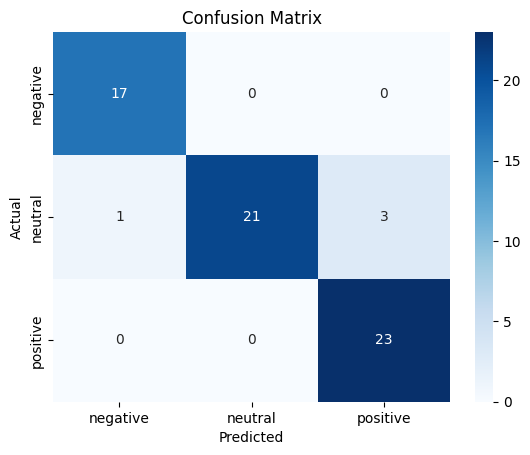

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()


In [ ]:
import joblib

# Load the pipeline
model = joblib.load('svr_sentiment_model.pkl')

In [ ]:
sample_texts = [
    "I love this product! It's amazing.",        # positive
    "The service was terrible.",                 # negative
    "The product arrived on time and was okay."  # neutral
]

predictions = model.predict(sample_texts)
print(predictions)

['positive' 'negative' 'positive']


In [ ]:
proba = model.predict_proba(sample_texts)
for text, p, pred in zip(sample_texts, proba, predictions):
    print(f"Text: {text}\nPredicted: {pred}, Probabilities: {p}\n")


Text: I love this product! It's amazing.
Predicted: positive, Probabilities: [0.16501406 0.11804967 0.71693627]

Text: The service was terrible.
Predicted: negative, Probabilities: [0.39366148 0.25001799 0.35632053]

Text: The product arrived on time and was okay.
Predicted: positive, Probabilities: [0.31635919 0.25298724 0.43065357]

